# 1.4.9 Contours in OpenCV

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('opencv_logo.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

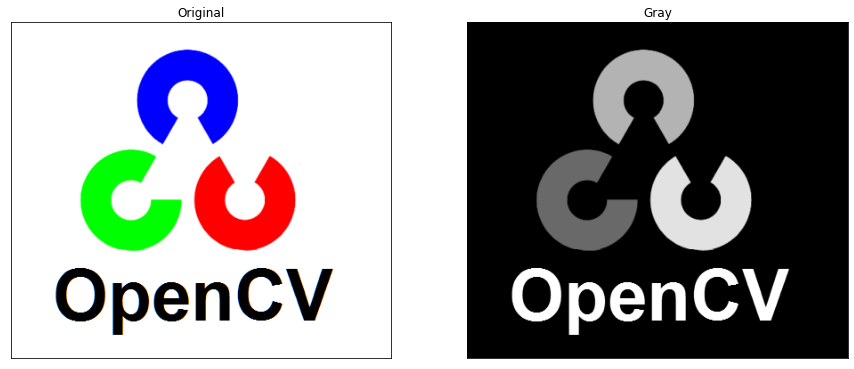

In [4]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
ret,thresh = cv2.threshold(imgray,64,255,cv2.THRESH_BINARY)

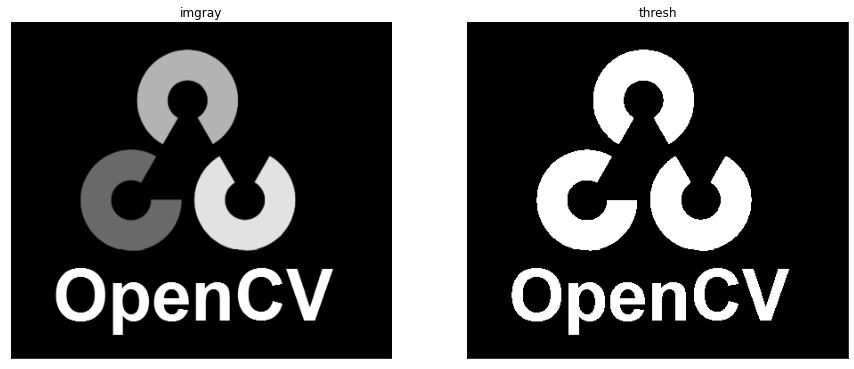

In [6]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

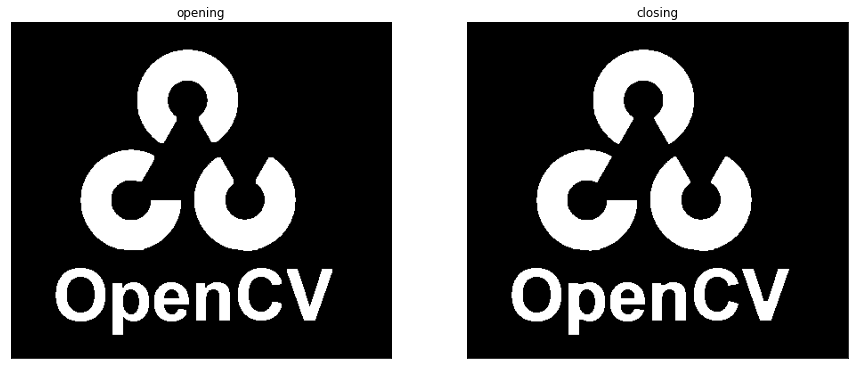

In [10]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(closing,cmap = 'gray')
plt.title('closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
imgcontour = cv2.drawContours(img, contours, -1, (255,32,32), 2)
img = cv2.imread('opencv_logo.png')

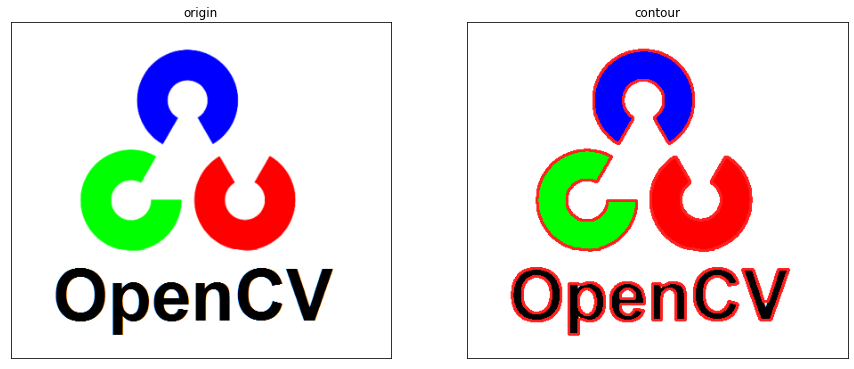

In [20]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.show()

In [65]:
cnt = contours[9]
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [66]:
imgcontour = cv2.imread('opencv_logo.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv_logo.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv_logo.png')

In [67]:
cnt.shape, approx.shape

((235, 1, 2), (112, 1, 2))

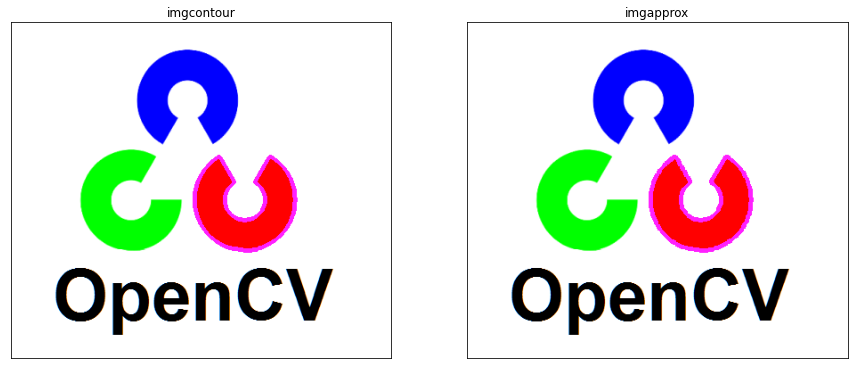

In [68]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
hull = cv2.convexHull(approx)

In [16]:
imghull = cv2.imread('opencv_logo.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

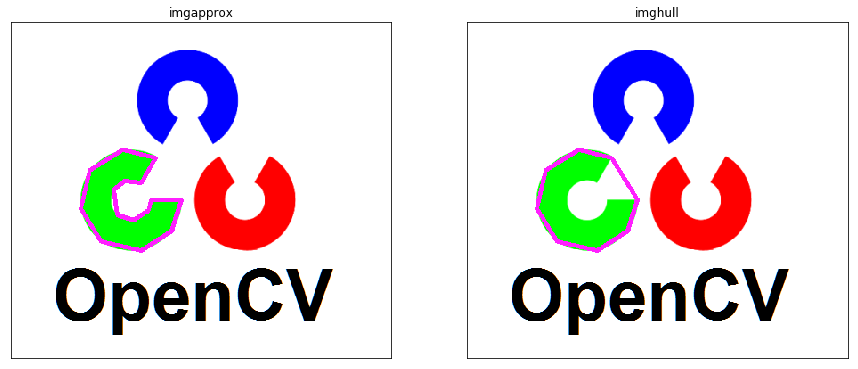

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv_logo.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

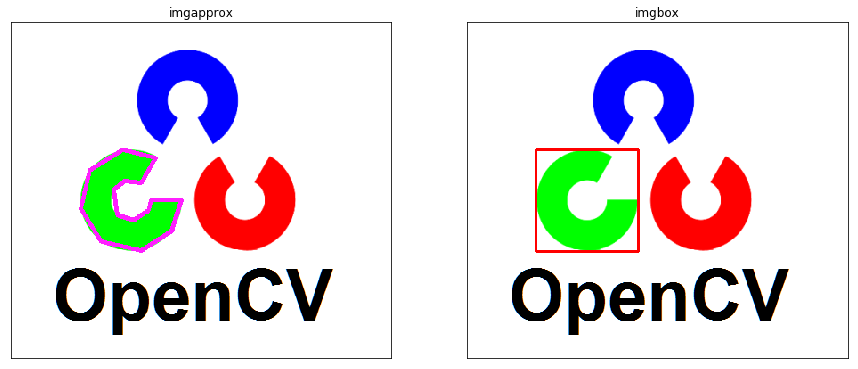

In [19]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
imgcontour = cv2.imread('opencv_logo.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

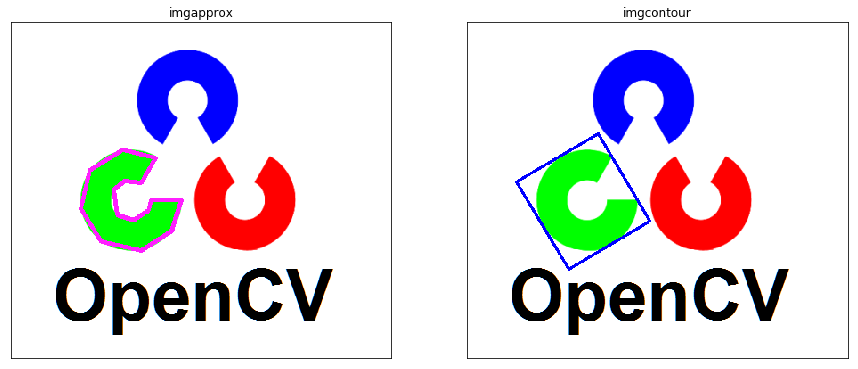

In [21]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [71]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 7033.0, 'm10': 1844883.3333333333, 'm01': 1463957.1666666665, 'm20': 491522014.8333333, 'm11': 384012181.0, 'm02': 309722067.3333333, 'm30': 132908506480.6, 'm21': 102256429069.91667, 'm12': 81242183876.61667, 'm03': 66529690921.25, 'mu20': 7575688.427658498, 'mu11': -10309.757460832596, 'mu02': 4991428.084834218, 'mu30': -1104747.8747253418, 'mu21': -51140330.094352245, 'mu12': 765719.0497202873, 'mu03': -18626152.664093018, 'nu20': 0.15315841733334729, 'nu11': -0.0002084333524101699, 'nu02': 0.10091217887411397, 'nu30': -0.0002663248132869002, 'nu21': -0.012328549504741017, 'nu12': 0.0001845941391810131, 'nu03': -0.004490261302155624}


In [72]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [73]:
area = cv2.contourArea(cnt)

In [74]:
perimeter = cv2.arcLength(cnt,True)

In [75]:
imginfo = cv2.imread('opencv_logo.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

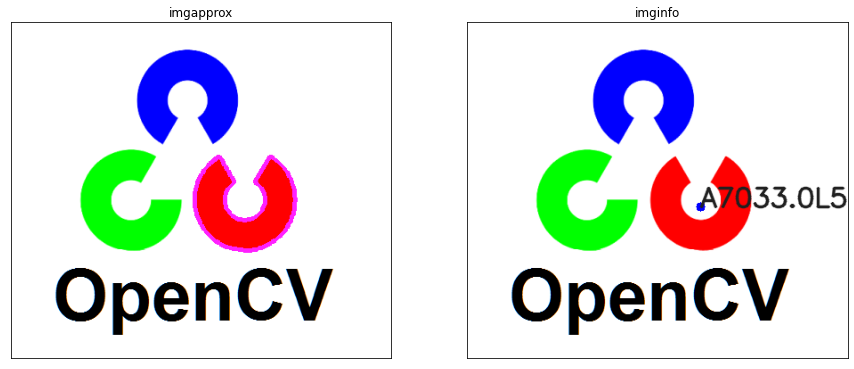

In [76]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()